# Image Classification using Neural Networks
In this lesson, we will learn more about unstructured inputs: images.

In this notebook, we will use a public dataset, the Fashion MNIST data set. This dataset contains 60,000 images (28 x 28) of 10 different types of clothes.

In addition, the test set contains 10,000 similar images.

### Step 1: Load and explore data
Using a python package by tensorflow (keras), we can directly import the data into our local environment.

We can use matplotlib to visualise some of the images.

In [78]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print()

In [79]:
print(train_images.shape)
print(type(train_images))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [80]:
print(test_images.shape)

(10000, 28, 28)


9


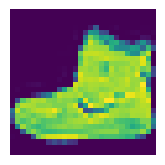

In [81]:
import matplotlib
import matplotlib.pyplot as plt

image = train_images[0]
image_pixels = image.reshape(28, 28)
plt.subplot(131)
plt.imshow(image_pixels)
plt.axis('off')

print(train_labels[0])
plt.show()

In [82]:
import numpy as np

(unique, counts) = np.unique(train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies


array([[   0, 6000],
       [   1, 6000],
       [   2, 6000],
       [   3, 6000],
       [   4, 6000],
       [   5, 6000],
       [   6, 6000],
       [   7, 6000],
       [   8, 6000],
       [   9, 6000]])

All classes are well-balanced

0 = Top / T-shirt<br>
1 = Trouser<br>
2 = Pullover<br>
3 = Dress<br>
4 = Coat<br>
5 = Sandal<br>
6 = Shirt<br>
7 = Sneaker<br>
8 = Bag<br>
9 = Ankle Boot

### Multi-class Classification

We will try using the architecture we learnt about last time - Artificial Neural Networks (ANNs)

We will also look at a much more efficient archiecture: Convolutional Neural Networks (CNNs)

In [83]:
train_images = train_images.reshape(60000, 28, 28, 1)
print(train_images.shape)

(60000, 28, 28, 1)


In [84]:
test_images = test_images.reshape(10000, 28, 28, 1)
print(test_images.shape)

(10000, 28, 28, 1)


### Fully Connected Neural Network (ANN)

This is the architecture we learnt about last lesson. 

In [112]:
ann = keras.models.Sequential()
#Input layer
ann.add(keras.layers.Flatten(input_shape=[28, 28, 1]))

In [113]:
#Hidden Layer 1
ann.add(keras.layers.Dense(50, activation='relu'))

#Hidden Layer 2
ann.add(keras.layers.Dense(25, activation='relu'))

In [114]:
#Output layer (with softmax)
ann.add(keras.layers.Dense(10, activation='softmax'))

In [115]:
ann.build((28, 28, 1))
ann.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 50)                39250     
                                                                 
 dense_34 (Dense)            (None, 25)                1275      
                                                                 
 dense_35 (Dense)            (None, 10)                260       
                                                                 
Total params: 40785 (159.32 KB)
Trainable params: 40785 (159.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
ann.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [117]:
ann.fit(train_images, train_labels, epochs=20, verbose=5)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


### Convolutional Neural Network (CNN)

This is the most commonly used architecture for image classification. 

Learn more about this architecture in this lesson's video: https://youtu.be/DbClQQZujxA

In [126]:
cnn = keras.models.Sequential()
#4 Convolutional Filters
cnn.add(keras.layers.Conv2D(4, (4, 4), strides=2, activation='relu', input_shape=(28, 28, 1)))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

In [127]:
cnn.add(keras.layers.Flatten())
cnn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 13, 13, 4)         68        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 4)           0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 144)               0         
                                                                 
Total params: 68 (272.00 Byte)
Trainable params: 68 (272.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
cnn.add(keras.layers.Dense(50, activation='relu'))
cnn.add(keras.layers.Dense(25, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 13, 13, 4)         68        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 4)           0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 144)               0         
                                                                 
 dense_42 (Dense)            (None, 50)                7250      
                                                                 
 dense_43 (Dense)            (None, 25)                1275      
                                                                 
 dense_44 (Dense)            (None, 10)                260       
                                                     

### Benefits of CNNs

Despite having a more complex architecture = more complex patterns, the number of parameters in a CNN are fewer (less than one-fourth).

|Architecture|HL 1|HL 2|Parameters|
|------------|----|----|----------|
|ANN|50|25|40785|
|CNN|50|25|8853|


In [129]:
cnn.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [130]:
cnn.fit(train_images, train_labels, epochs=20, verbose=5)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


### Evaluating the Models

In [131]:
ann_score = ann.evaluate(test_images, test_labels)
print(f"ANN Accuracy: {ann_score[1]}")

313/313 [==============================] - 0s 646us/step - loss: 1.6052 - accuracy: 0.5947
ANN Accuracy: 0.5946999788284302


In [132]:
cnn_score = cnn.evaluate(test_images, test_labels)
print(f"CNN Accuracy: {cnn_score[1]}")

313/313 [==============================] - 0s 617us/step - loss: 0.5009 - accuracy: 0.8349
CNN Accuracy: 0.8349000215530396


Therefore, we can determine that for tasks related to images, CNNs are much more efficient and perform much better than ANNs.